In [1]:
# Import Libraries
import torch
from data_handler import Data_Handler
import torch.autograd as ag
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Network and Testing Batch
net = torch.load('buildings_model.pkl')
data_handler = Data_Handler('mass_buildings', 'test')
dataset = data_handler.create_dataset()
batch = data_handler.create_batch(dataset, 3) 

# Move to GPU
inputs = ag.Variable(batch[0].type(torch.FloatTensor), requires_grad = False)
if torch.cuda.is_available():
    inputs = inputs.cuda()
    net = net.cuda()

In [3]:
# Run Test through trained model
yinit = net(inputs)

Original Image


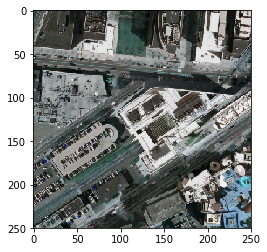

Ground Truth


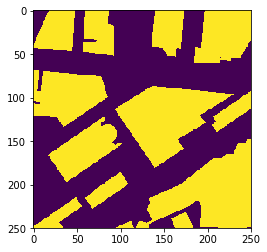

Prediction


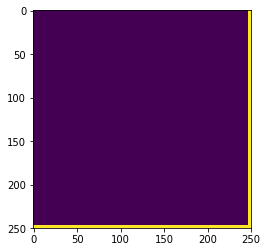

Original Image


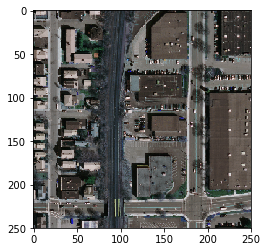

Ground Truth


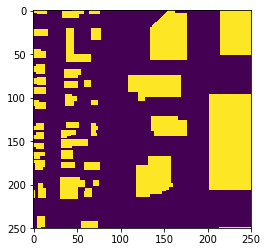

Prediction


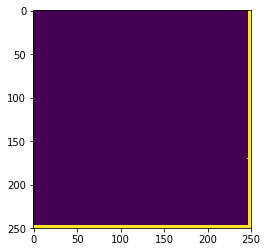

Original Image


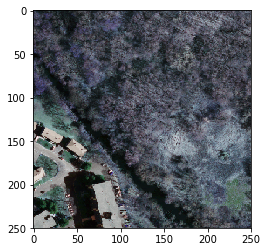

Ground Truth


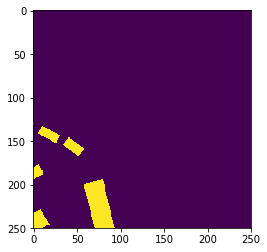

Prediction


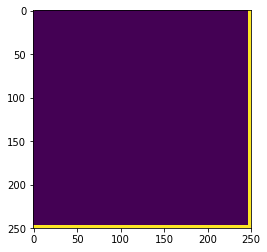

Original Image


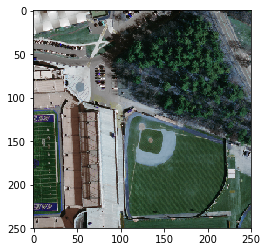

Ground Truth


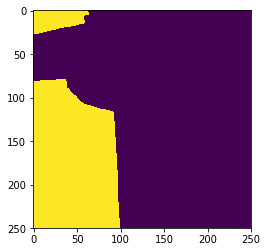

Prediction


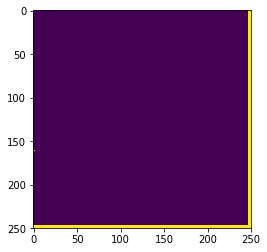

Original Image


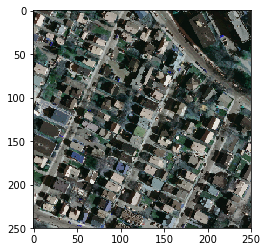

Ground Truth


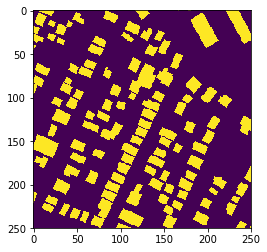

Prediction


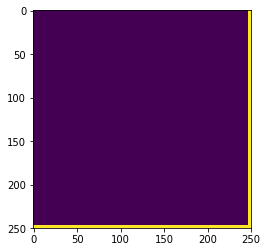

Original Image


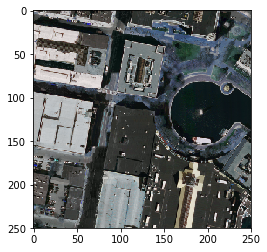

Ground Truth


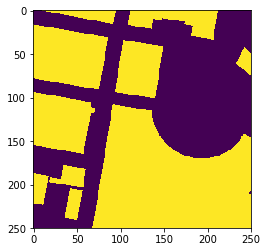

Prediction


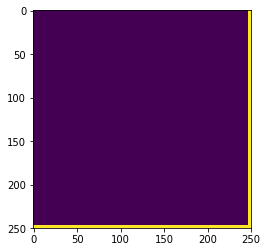

Original Image


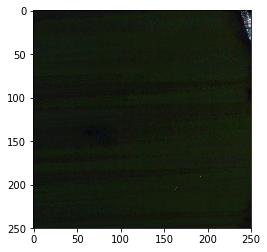

Ground Truth


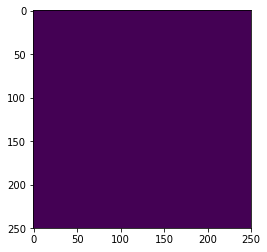

Prediction


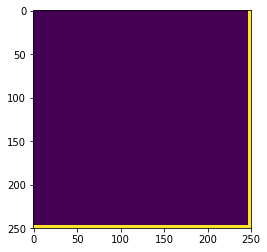

Original Image


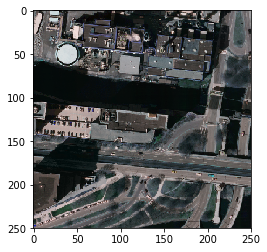

Ground Truth


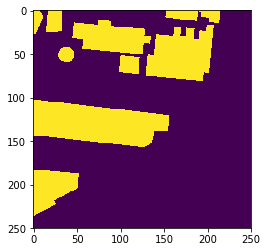

Prediction


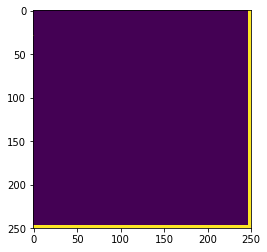

Original Image


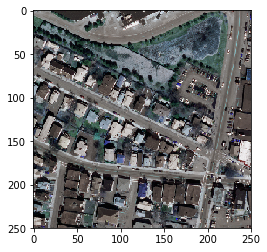

Ground Truth


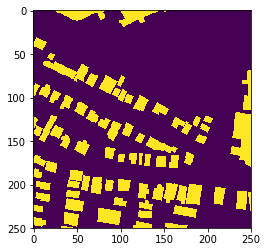

Prediction


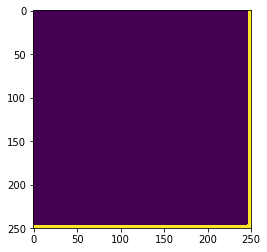

Original Image


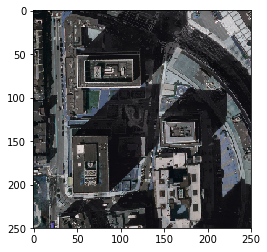

Ground Truth


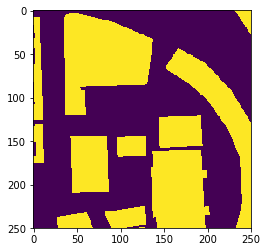

Prediction


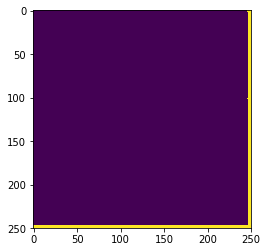

In [5]:
# Define function to show output of images, ground truth, and prediction
def show_output(im, la, out):
    im = im.numpy()
    la = la.numpy()
    out = out.cpu()
    out = out.data.numpy()
    output = np.zeros((im.shape[0], im.shape[2], im.shape[3]))
    for cnt in range(im.shape[0]):
        for x in range(im.shape[2]):
            for y in range(im.shape[3]):
                if out[cnt,0,x,y] > out[cnt,1,x,y]:
                    output[cnt, x, y] = 0
                else:
                    output[cnt, x, y] = 1
    im = np.moveaxis(im, [2, 3], [1, 2])
    for cnt in range(im.shape[0]):
        plt.pause(0.001)
        print('Original Image')
        plt.imshow(im[cnt,:,:,:])
        plt.pause(0.001)
        print('Ground Truth')
        plt.imshow(la[cnt,:,:])
        plt.pause(0.001)
        print('Prediction')
        plt.imshow(output[cnt,:,:])
    
show_output(batch[0], batch[1], yinit)

